In [1]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx

In [42]:
with open('graph', 'rb') as f:
    graph = pickle.load(f)

In [43]:
d={'doc1': {'doc2': {'weight':1},
            'doc3': {'weigth':1},
            'doc4': {'weigth':10}
           },
   'doc2':{'doc3': {'weight':1}}
  } 
G = nx.Graph(graph)


In [44]:
G.nodes

NodeView(('2017-2-255778', '2018-1-301412', '2017-2-258449', '2018-1-301174', '2017-1-181810', '2017-1-182177', '2017-1-182970', '2018-2-345176', '2018-1-302052', '2017-2-255790', '2017-2-257721', '2017-1-181833', '2017-1-182258', '2018-2-345191', '2017-2-256999', '2018-1-302067', '2017-2-257725', '2017-2-261440', '2018-1-301156', '2017-2-261448', '2017-1-181837', '2017-1-181811', '2017-2-255793', '2018-2-345189', '2018-2-350557', '2018-2-345209', '2018-1-301383', '2017-2-257011', '2018-1-302057', '2017-1-182231', '2017-1-182977', '2017-1-182983', '2017-1-182182', '2018-1-302055', '2017-2-261457', '2017-2-257730', '2017-2-257745', '2017-2-255779', '2018-1-302056', '2018-1-301410', '2018-1-300664', '2018-2-350195', '2018-2-350167', '2018-2-349624', '2018-1-301144', '2017-1-182240', '2017-2-261458', '2018-2-345198', '2017-2-257738', '2018-2-350547', '2017-2-257735', '2017-1-182238', '2018-2-349604', '2018-1-299250', '2018-2-345397', '2018-2-350558', '2018-1-300631', '2017-2-261456', '201

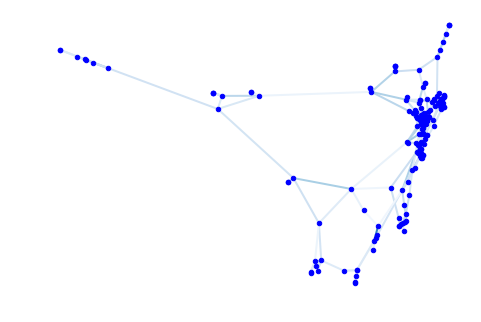

<Figure size 3600x3600 with 0 Axes>

In [51]:

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
#nx.draw(G,pos=nx.spring_layout(G),edge_labels=labels)#with_labels=True
#nx.draw(G, node_color='b', edgelist=edges, edge_color=weights, width=2.0, edge_cmap=plt.cm.Blues,node_size=20)
#nx.draw_random(G, node_color='b', edgelist=edges, edge_color=weights, width=3.0, edge_cmap=plt.cm.Blues,node_size=300)
#nx.draw_circular(G, node_color='b', edgelist=edges, edge_color=weights, width=1.0, edge_cmap=plt.cm.Blues,node_size=10)
nx.draw_spectral(G, node_color='b', edgelist=edges, edge_color=weights, width=2.0, edge_cmap=plt.cm.Blues,node_size=20)
#nx.draw_spring(G, node_color='b', edgelist=edges, edge_color=weights, width=2.0, edge_cmap=plt.cm.Blues,node_size=20)
plt.figure(figsize=(50,50)) ;
plt.draw() 

In [8]:
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models.graphs import from_networkx
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, BoxZoomTool, ResetTool

In [41]:
plot = figure(title="Networkx Integration Demonstration", x_range=(-2.1,2.1), y_range=(-2.1,2.1), tools="", toolbar_location=None)
graphOut = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
node_hover_tool = HoverTool(tooltips=[("index", "@index"), ("club", "@club")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())
plot.renderers.append(graphOut)
output_file("networkx_graph.html")
show(plot)

In [121]:
weights


(0.9476767778396606,
 0.598151445388794,
 0.5920310020446777,
 0.5793975591659546,
 0.5619028806686401,
 0.8361032009124756,
 0.5920007228851318,
 0.591431736946106,
 0.586325466632843,
 0.5835629105567932,
 0.5306313633918762,
 0.9831390976905823,
 0.7812432050704956,
 0.6352699995040894,
 0.6121566891670227,
 0.6121134161949158,
 0.7825295925140381,
 0.634773850440979,
 0.6223730444908142,
 0.6122491955757141,
 0.5895552635192871,
 0.5634755492210388,
 0.5627742409706116,
 0.5553158521652222,
 0.6161831617355347,
 0.6110287308692932,
 0.5915987491607666,
 0.5910390019416809,
 0.8071467876434326,
 0.5484683513641357,
 0.5444729328155518,
 0.5386831760406494,
 0.5542558431625366,
 0.5504422187805176,
 0.5372802019119263,
 0.5356688499450684)